In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data follows Gaussian Distribution 
Find the extreme boundries i.e end value of 3rd Standard Deviation on both sides.
Data after those boudries i.e. for lower boundary -data to left and for upper boundary -data to right are considered outliers

In [39]:
titanic=pd.read_csv('data_sets/titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
data=titanic[['Age','Fare','Survived']]
data.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


C:\Users\vikash arya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

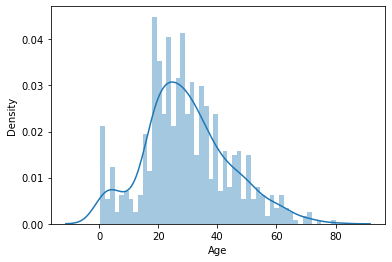

In [41]:
#check for Age
#distribution plot
sns.distplot(data['Age'],bins=50)

C:\Users\vikash arya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

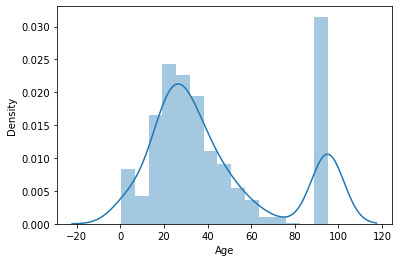

In [42]:
# Age Almost follows a normal distribution 
#but there are no outliers
#but what if we fill NANs with an extreme value
#we can generate some outliers 
sns.distplot(data['Age'].fillna(95))

In [46]:

#find upper and lower boundries 
upper_boundary=data.Age.mean()+(3*data.Age.std())
lower_boundary=data.Age.mean()-(3*data.Age.std())
print('Upper Boundary : ',upper_boundary,'\n','Lower Boundary : ',lower_boundary)
print('But age can not be negative so for us lower boundary is 0')

Upper Boundary :  73.27860964406095 
 Lower Boundary :  -13.88037434994331
But age can not be negative so for us lower boundary is 0


In [47]:
# Either remove or replace the Age value above 73
data_removed=data[data['Age']<73]
data_replaced=data.copy()
data_replaced.loc[data_replaced['Age']>=73,'Age']=73
data_replaced.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


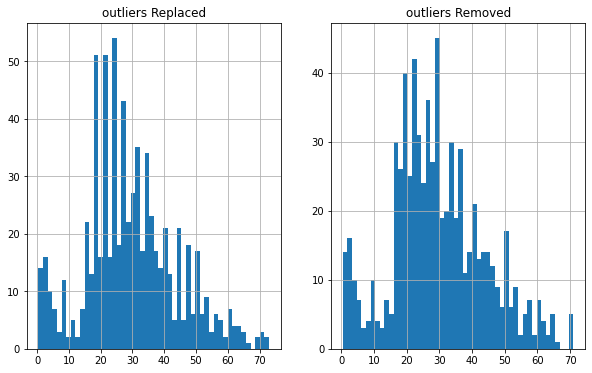

In [59]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
data_replaced.Age.hist(bins=50)
plt.title('outliers Replaced')
plt.subplot(1,2,2)
data_removed.Age.hist(bins=50)
plt.title('outliers Removed')
plt.show()

# 2. Data Is Skewed 
Here Inner Quartile Range is used to calculate either boundries or extreme boundries
IQR=75th percentile - 25th percentile


In [60]:
data=titanic[['Age','Fare']]
data.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


<AxesSubplot:>

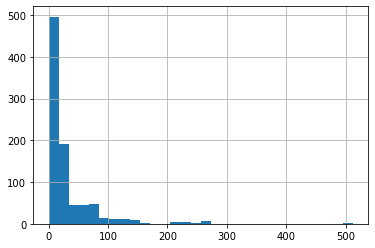

In [62]:
data.Fare.hist(bins=30)

C:\Users\vikash arya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

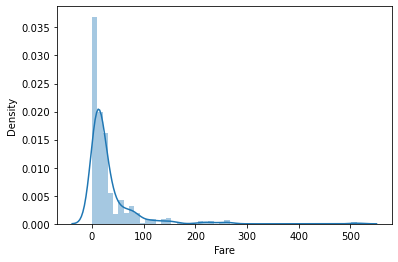

In [64]:
#above histrogram shows that data in fare is right skewed i.e. stretched towards right
sns.distplot(data.Fare,bins=50)

In [67]:
# upper and lower boundries
IQR=data.Fare.quantile(0.75)-data.Fare.quantile(0.25)
upper_boundary=data.Fare.quantile(0.75)+IQR*1.5
lower_boundary=data.Fare.quantile(0.25)-IQR*1.5
print('Upper Boundary : ',upper_boundary)
print('Lower Boundary : ',lower_boundary)

Upper Boundary :  65.6344
Lower Boundary :  -26.724


In [68]:
# upper and lower  "EXTRME" boundries
IQR=data.Fare.quantile(0.75)-data.Fare.quantile(0.25)
upper_boundary=data.Fare.quantile(0.75)+IQR*3
lower_boundary=data.Fare.quantile(0.25)-IQR*3
print('Upper Extreme Boundary : ',upper_boundary)
print('Lower Extreme Boundary : ',lower_boundary)

Upper Extreme Boundary :  100.2688
Lower Extreme Boundary :  -61.358399999999996


In [70]:
data_removed=data[data['Fare']<=100.2688]
data_replaced=data.copy()
data_replaced.loc[data.Fare>=100,'Fare']=100


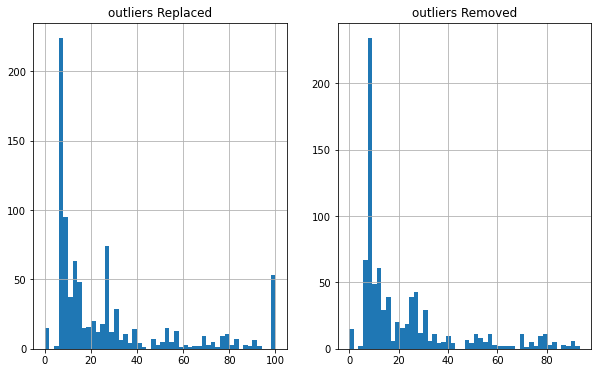

In [71]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
data_replaced.Fare.hist(bins=50)
plt.title('outliers Replaced')
plt.subplot(1,2,2)
data_removed.Fare.hist(bins=50)
plt.title('outliers Removed')
plt.show()